# Vector Fast Fourier Transform

Here we analyze how to obtain vector focusing of a DOE with a perfect lens. 

The first result is that given by: T. G. Jabbour and S. M. Kuebler, “Vectorial beam shaping,” Opt. Express, vol. 16, no. 10, p. 7203, 2008. DOI: 10.1364/oe.16.007203 (https://www.osapublishing.org/oe/fulltext.cfm?uri=oe-16-10-7203&id=158112. In this case, the input field is linearly polarized at x.

However, the results where improved by: K. Jahn and N. Bokor, “Intensity control of the focal spot by vectorial beam shaping,” Opt. Commun., vol. 283, no. 24, pp. 4859–4865, 2010, doi: 10.1016/j.optcom.2010.07.030. In this case, the input polarization is arbitrary. The results are better

In these works there are several things to perform:

- Generation of vector propagation at focus.
- Development of examples.
- Parameters for optimization.
- Algorithms of optimization.


The incident field is an vector field (Ex, Ey, Ez) and it is propagated and converted to (Ex,Ey,Ez)

In [1]:
%load_ext autoreload
%autoreload 2

In [45]:
from matplotlib import rcParams
from matplotlib import cm

rcParams['figure.dpi']=300

In [46]:
from diffractio import np, sp, plt
from diffractio import nm, um, mm, degrees

In [47]:
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [48]:
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY

## Vector FFT: Jahn and Bokor

## Examples

In [49]:
size=64*um
x0=np.linspace(-size/2,size/2,512)
y0=np.linspace(-size/2,size/2,512)

wavelength = 0.6328 * um


(<Figure size 1800x1200 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7fdb977a7850>)

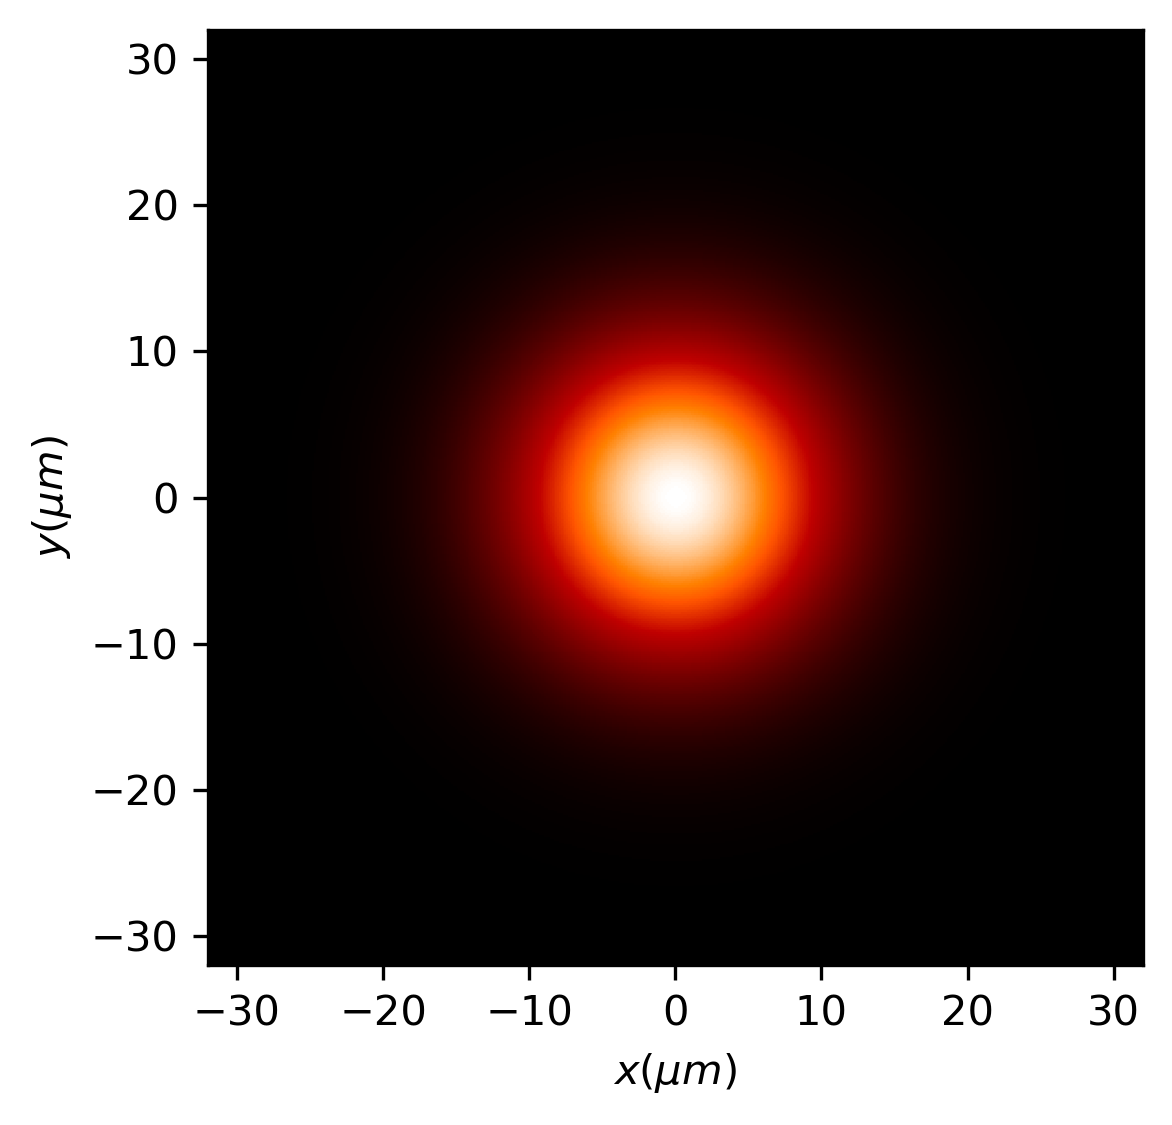

In [50]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
    r0=(0, 0),
    w0=(16 * um, 16 * um),
    z0=0 * um,
    A=1,
    theta=0. * degrees,
    phi=0 * degrees)

u0.draw()

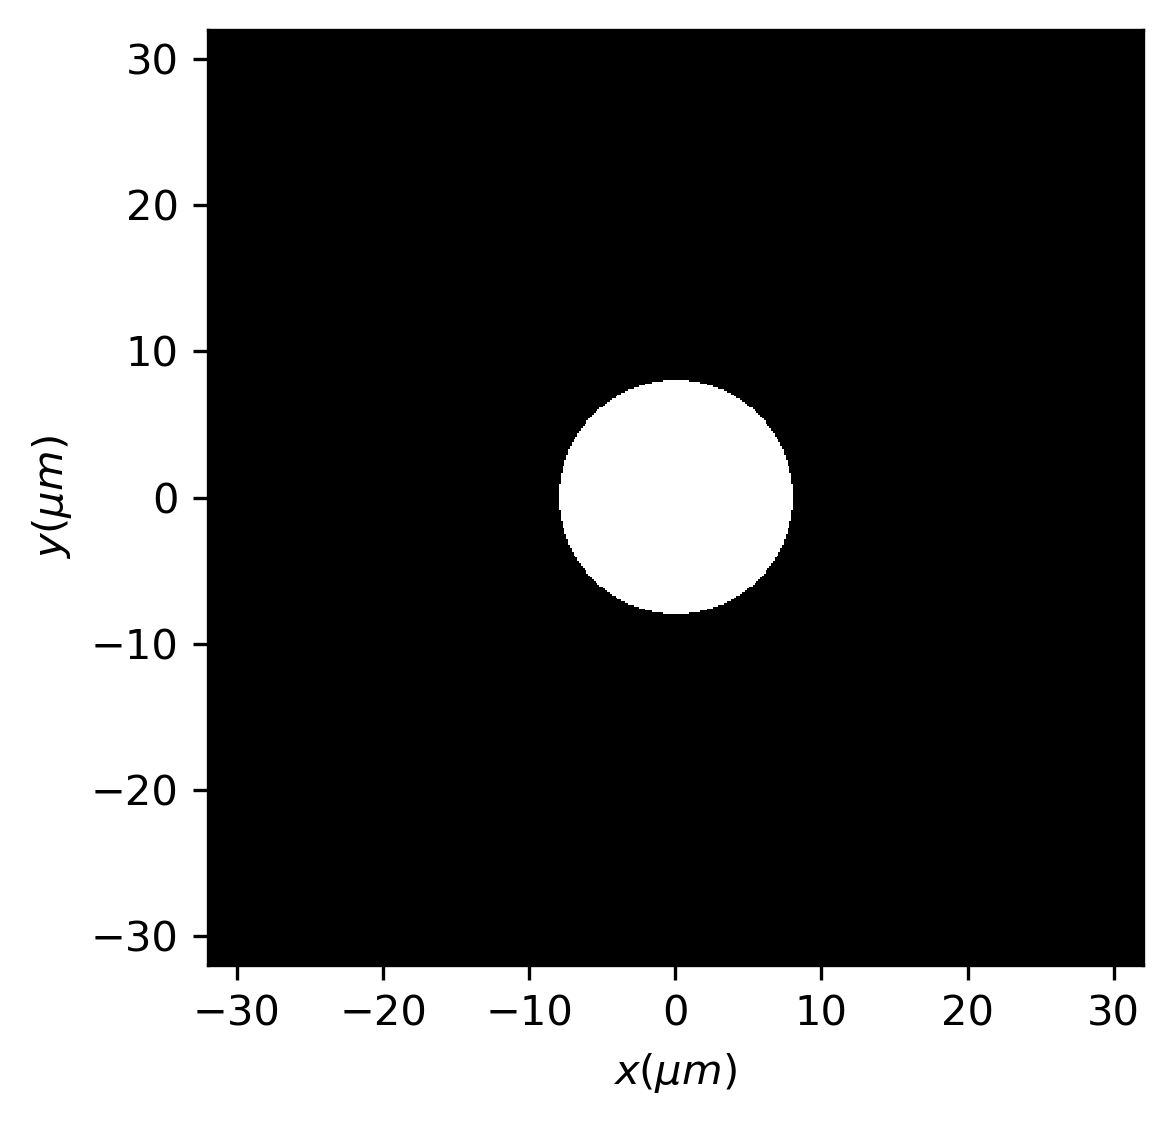

In [51]:
radius=8*um
t=Scalar_mask_XY(x0,y0,wavelength)
t.circle(r0=(0,0), radius=radius)
t.draw();

In [52]:
u1=t*u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_wave(u=u1, v=(1,0))
#EM1.radial_wave(u=u1, r0=(0,0), radius=(200,200))


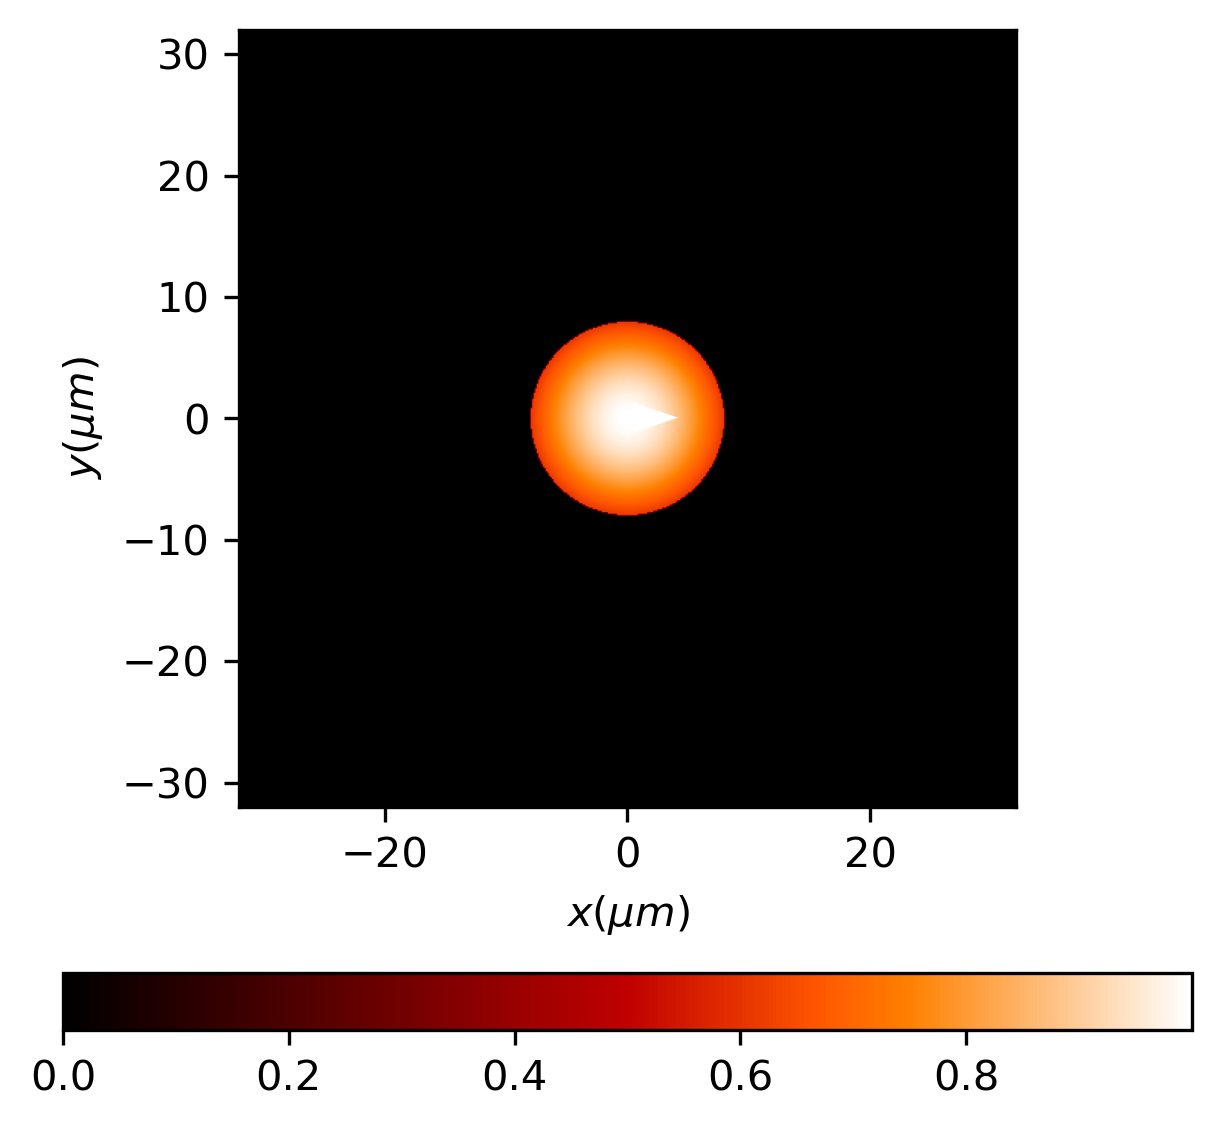

In [53]:
EM1.draw(kind='ellipses',amplification=0.125, num_ellipses=(7,7));

In [54]:
EM2 = EM1.VFFT(radius=64*um, focal=10*um, remove0=False, n=1, new_field= True, has_draw=False);

In [55]:
x_resample=8
EM2.cut_resample([-x_resample,x_resample], [-x_resample,x_resample], num_points=(512,512));

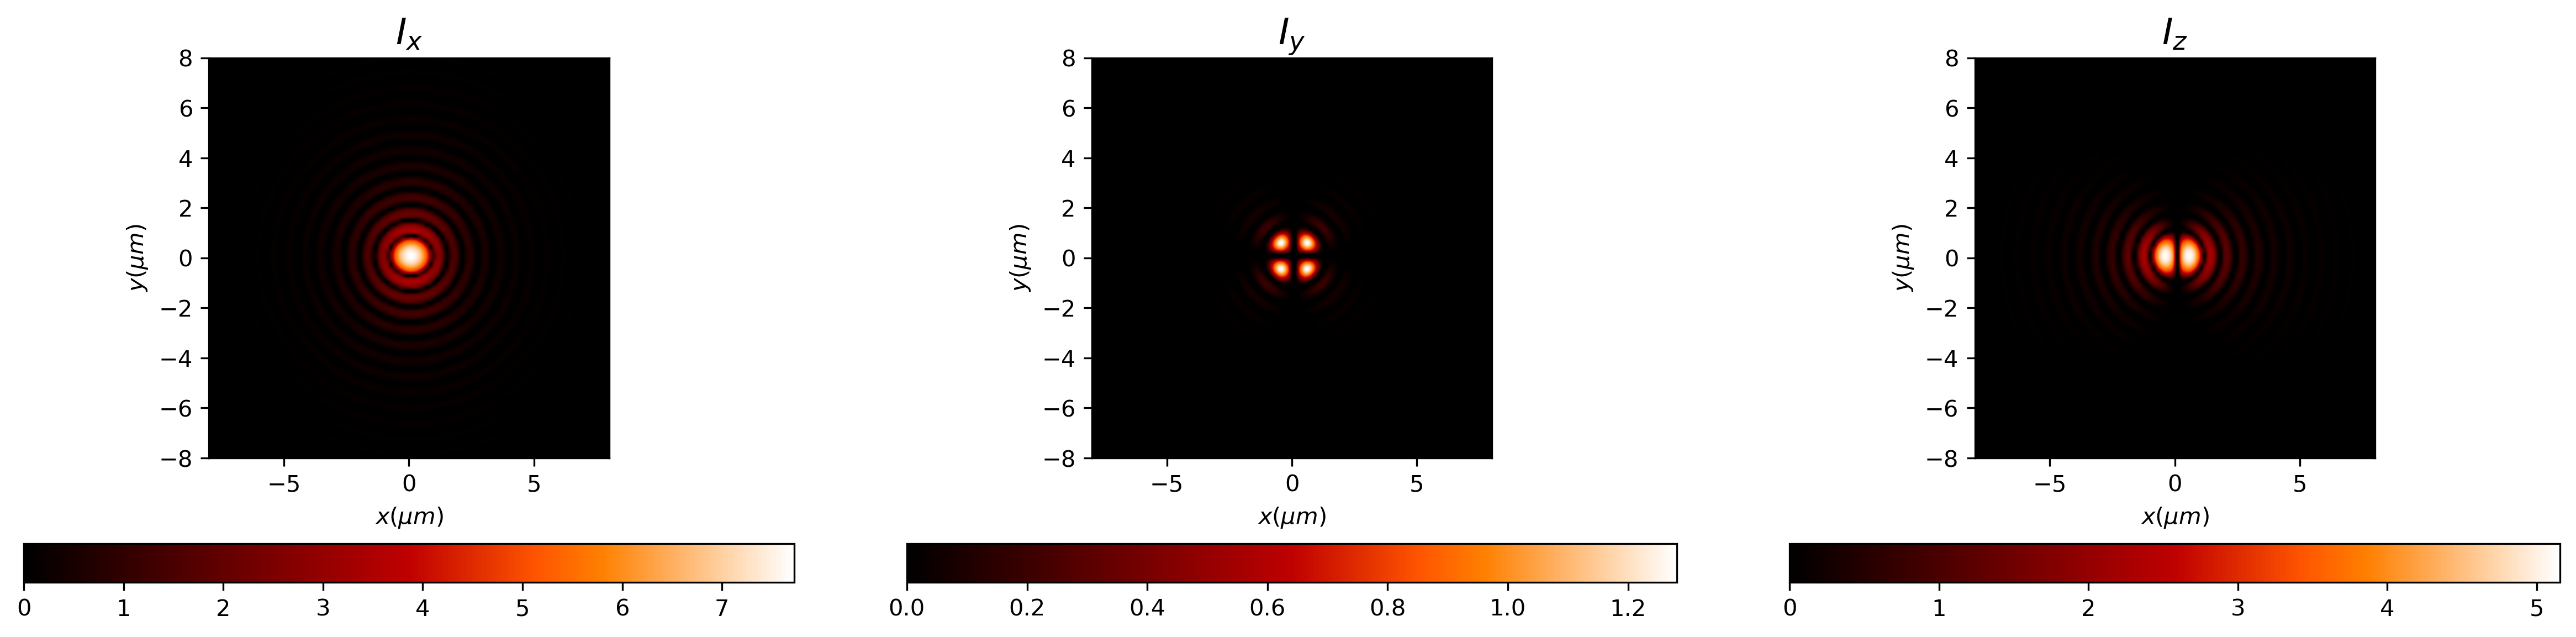

In [56]:
EM2.draw('intensities', logarithm=1e-3);

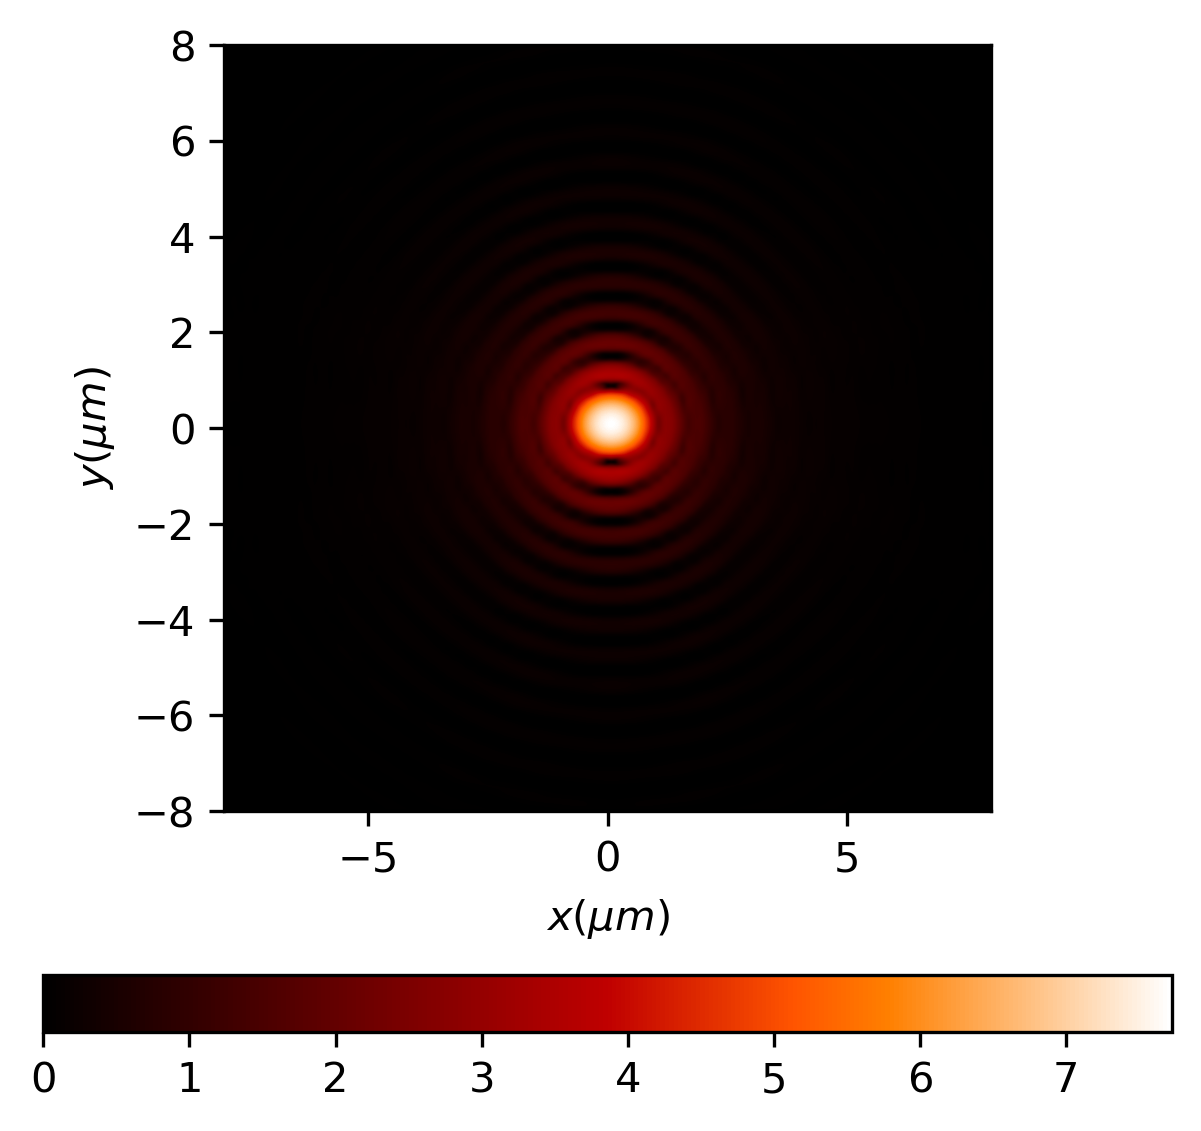

In [57]:
EM2.draw('intensity', logarithm=1e-3);

### Scalar field

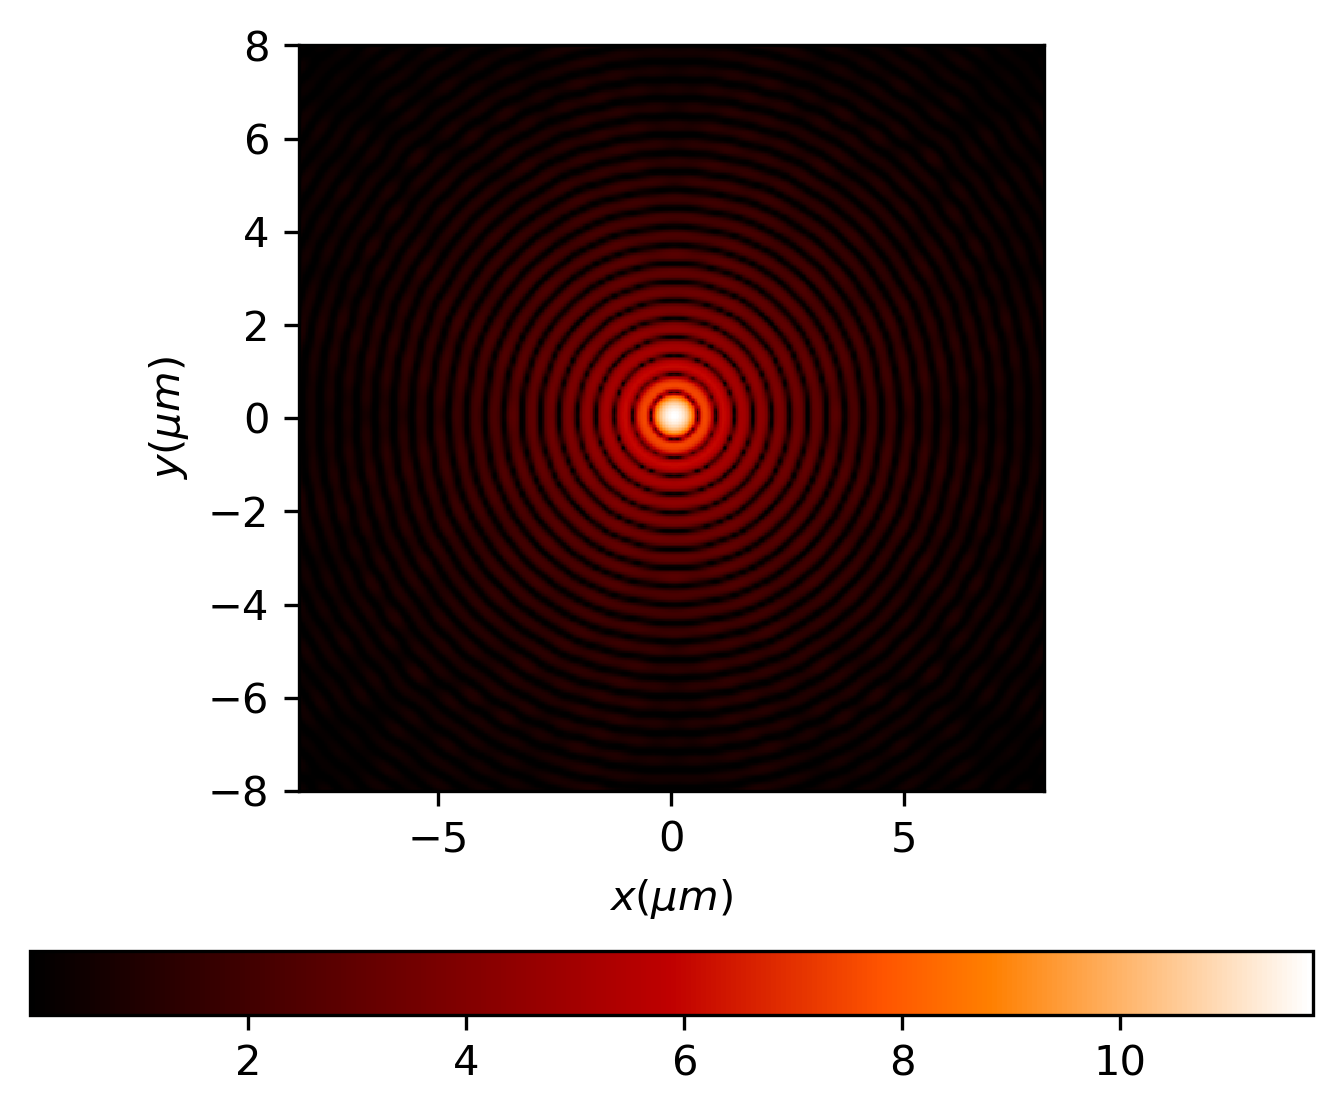

In [58]:
u_fft=u1.fft( z=10*um, new_field=True, remove0=False)
u_fft.cut_resample(x_limits=(-x_resample,x_resample), y_limits=(-x_resample,x_resample), num_points=[512,512])
u_fft.draw(logarithm=1e-3, has_colorbar='horizontal'); plt.tight_layout()

## Comparison with VRS

Here, we need to include the lens in the mask

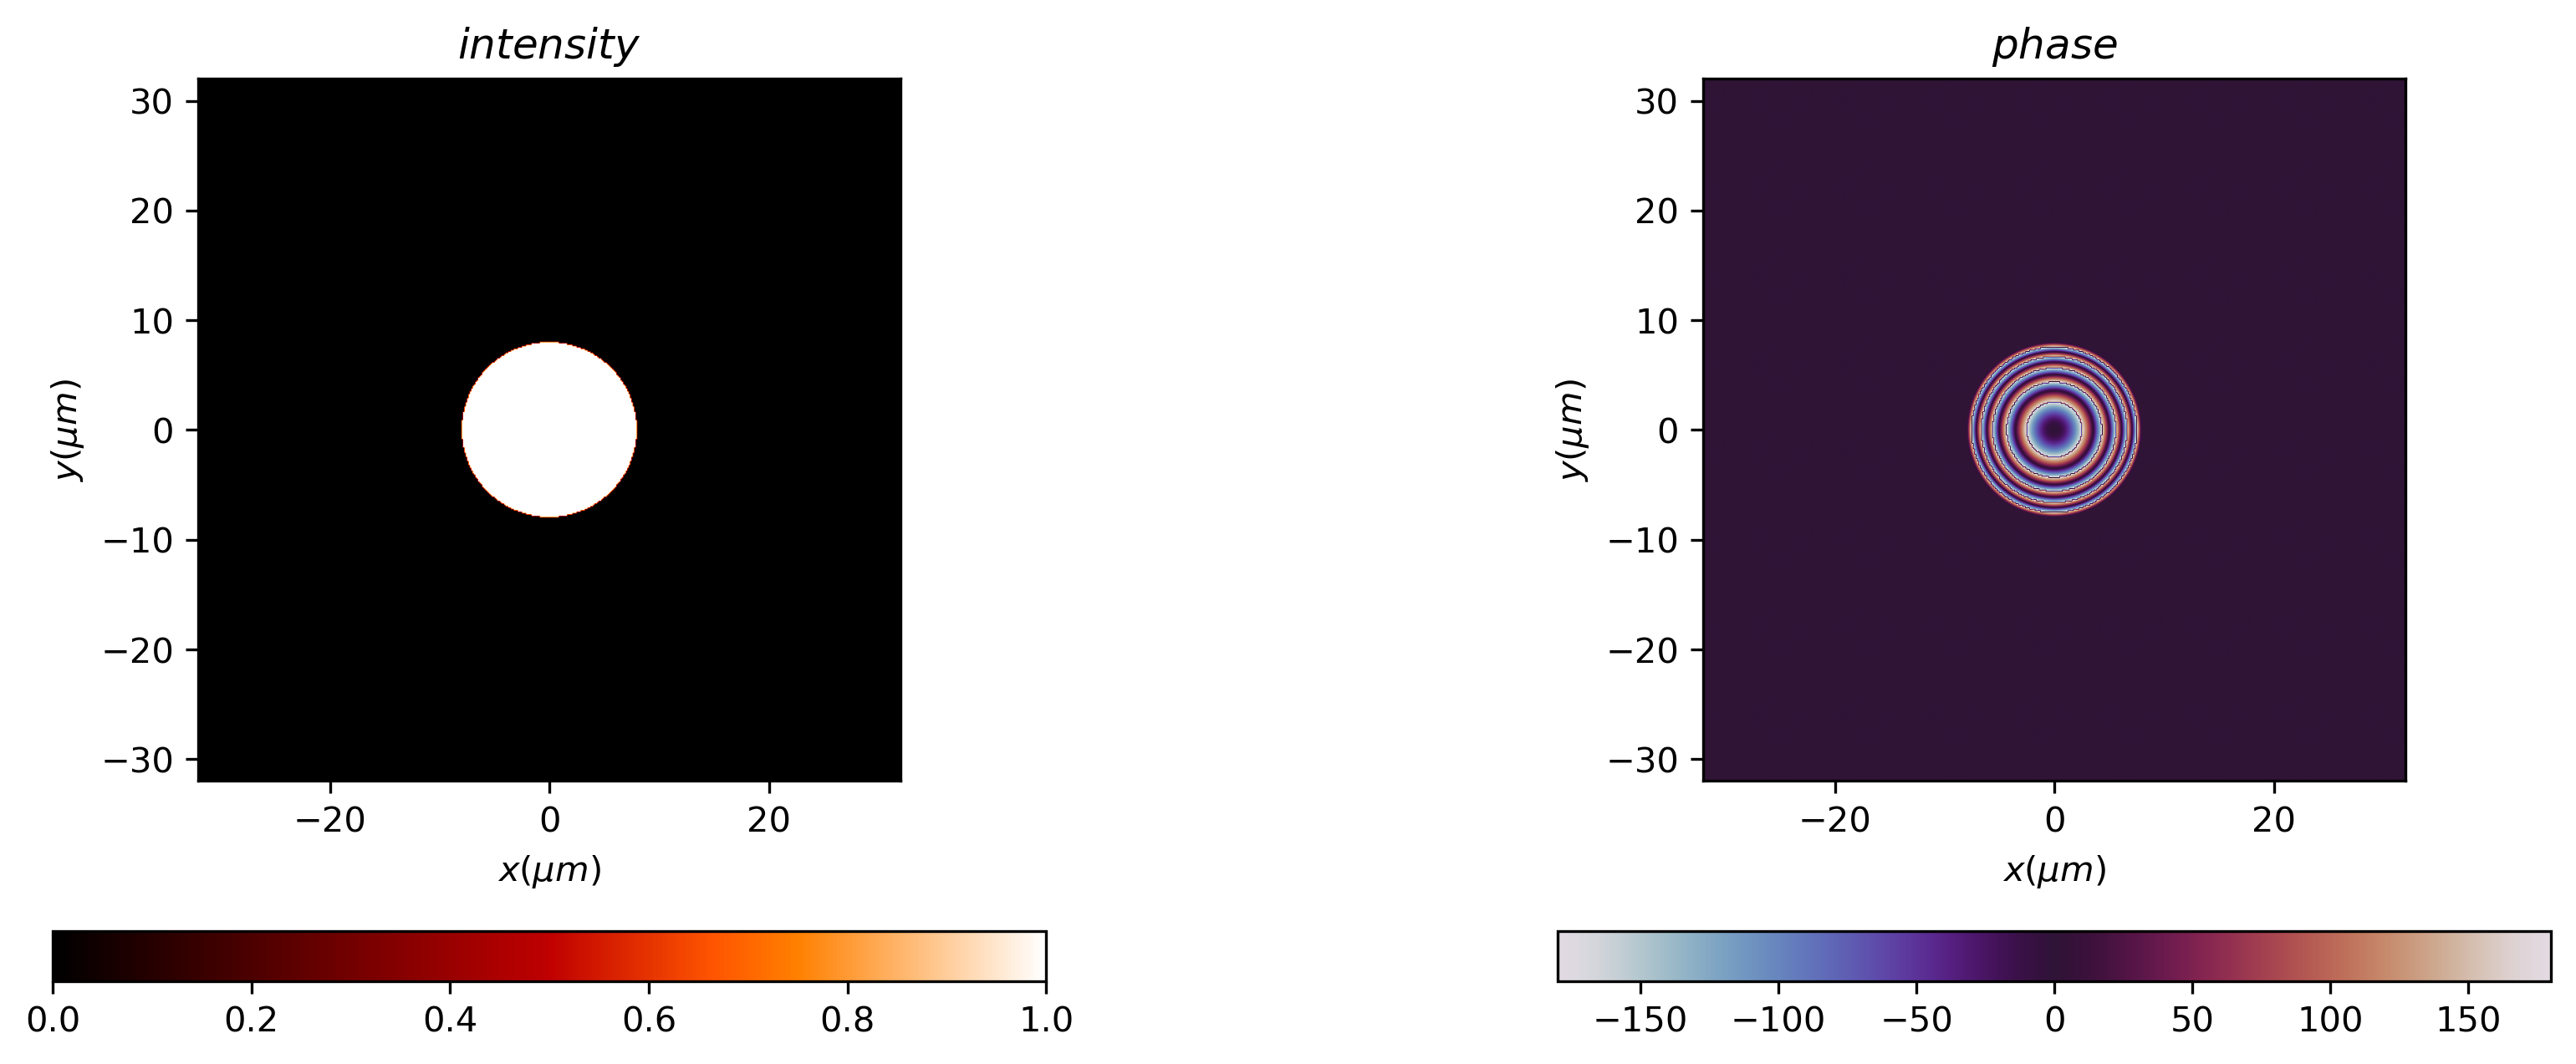

In [59]:
radius=8*um
t=Scalar_mask_XY(x0,y0,wavelength)
t.lens(r0=(0,0), radius=radius, focal=10*um)
t.draw('field');

In [60]:
u1=t*u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_wave(u=u1, v=(1,0))


In [61]:
EM3 = EM1.VRS(z=10*um, n=1, new_field= True)

In [62]:
x_resample=8
EM3.cut_resample([-x_resample,x_resample], [-x_resample,x_resample], num_points=(1024,1024))
EM3.normalize()

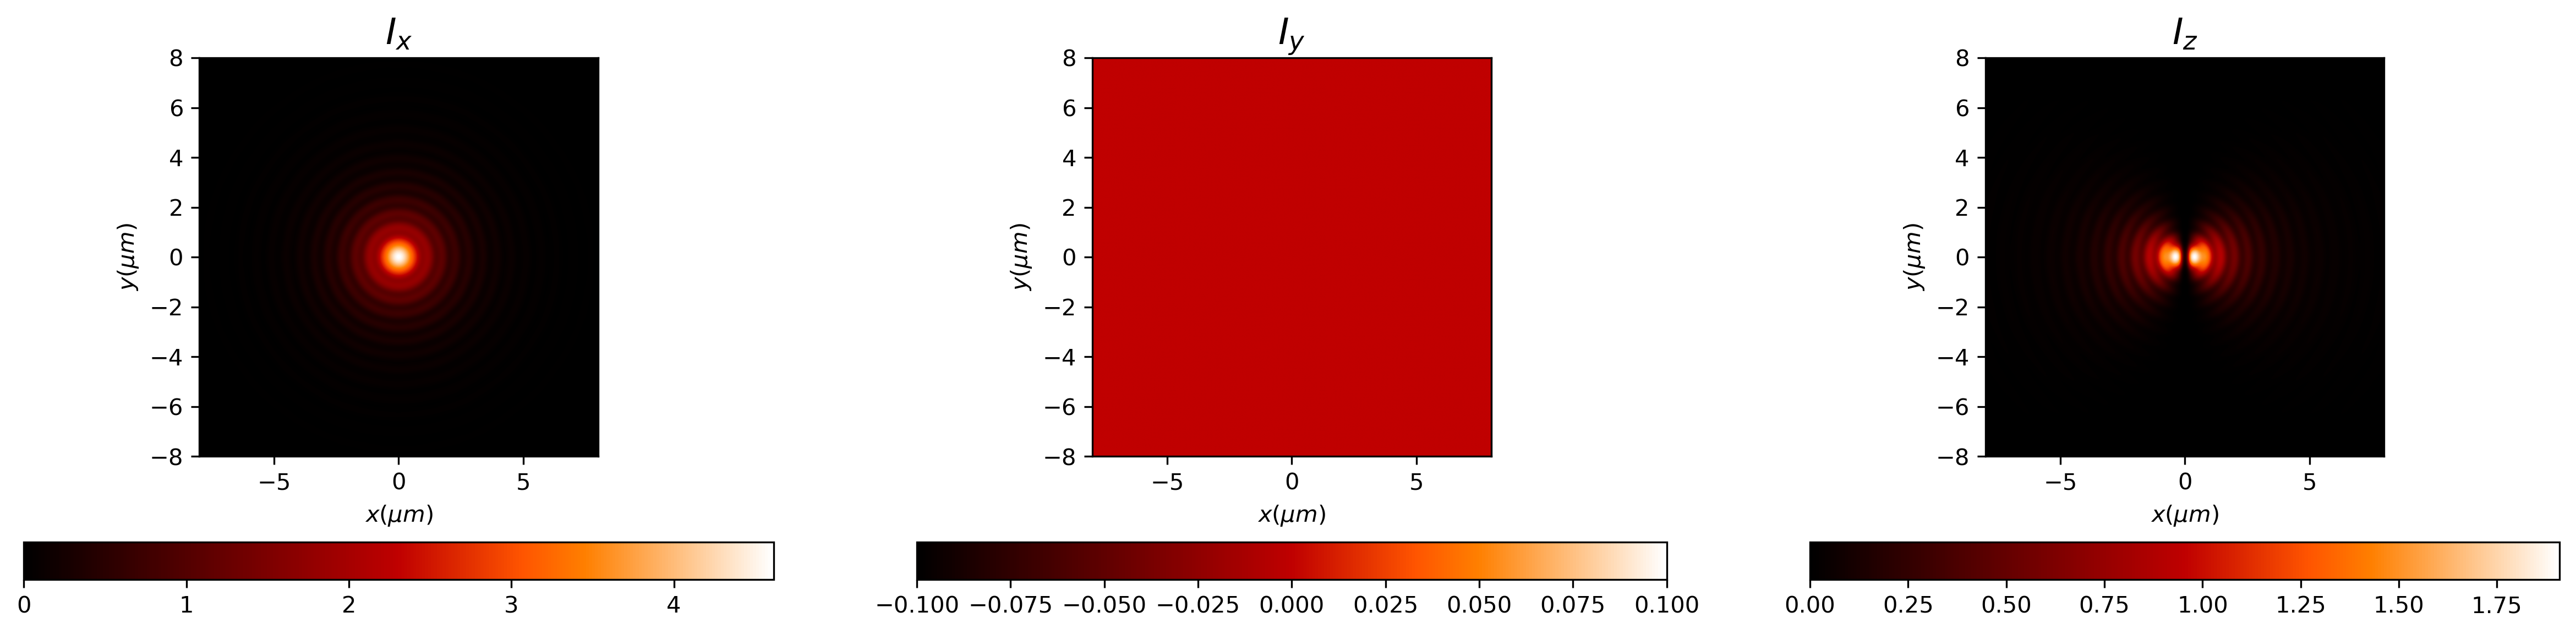

In [65]:
EM3.draw('intensities', logarithm=1e2);

Let us compare with the field at the focus with that of the VFFT approximation.

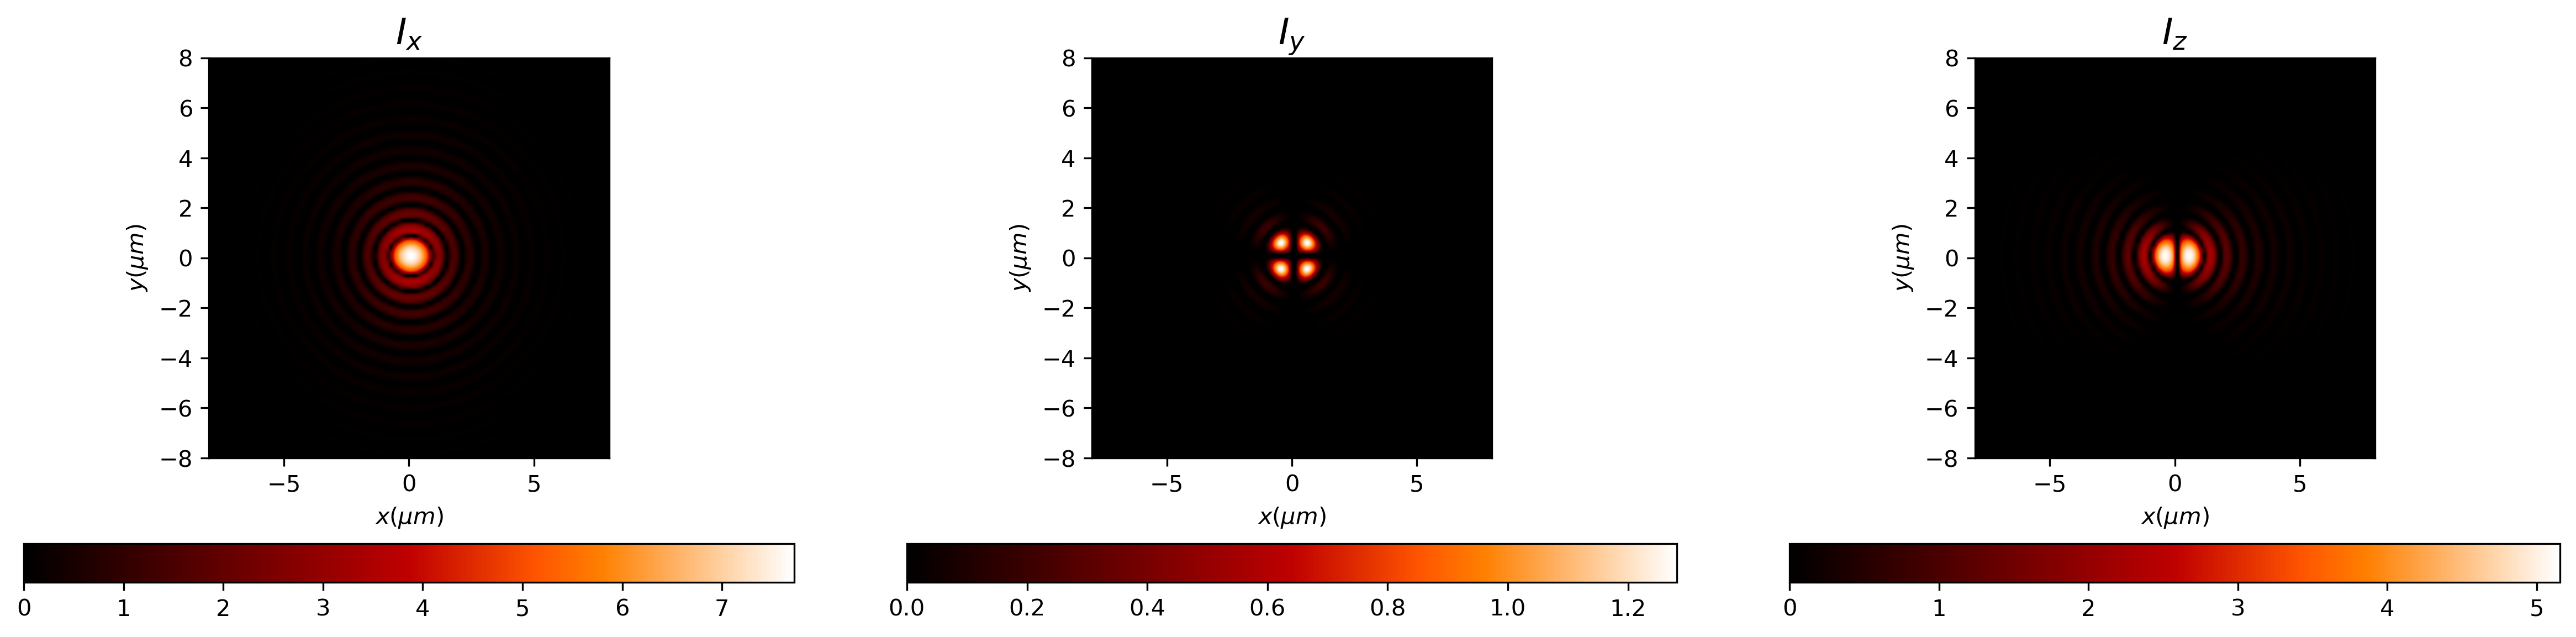

In [66]:
EM2.draw('intensities', logarithm=1e-3);

We can see that the $I_x$ and $I_z$ are reproduced, but the VRS algorithm is not able to generate $I_y$ field.